# 単回帰分析

傾きaの計算式

$$
a= \frac{\sum_{n=1}^Nx_{n}y_{n}}{\sum_{n=1}^Nx_{n}^2}
$$

サンプルのデータ

|x | y|
|:--:|:--:|
|1 | 2 |
|2|3.9||
|3 | 6.1 |

Numpy: 数値計算
-----------------

In [1]:
import numpy as np

In [2]:
# ベクトルの定義
x = np.array([1, 2, 3])

In [3]:
x

array([1, 2, 3])

In [8]:
y = np.array([ 2. , 3.9, 6.1])

In [9]:
y

array([ 2. ,  3.9,  6.1])

データの中心化
--------------


In [10]:
# 平均の算出
x.mean()

2.0

In [11]:
y.mean()

4.0

In [12]:
# 中心化
xc = x - x.mean()

In [13]:
xc

array([-1.,  0.,  1.])

In [14]:
yc = y - y.mean()

In [15]:
yc

array([-2. , -0.1,  2.1])

パラメタaの計算
------------------

In [22]:
# 要素ごとの掛け算(要素積)
xx = xc * xc

array([ 1.,  0.,  1.])

In [23]:
xx

array([ 1.,  0.,  1.])

In [26]:
xy = xc * yc

In [28]:
a = xy.sum()/xx.sum()

In [29]:
a


2.0499999999999998

# Pandas : データベースの操作

In [30]:
import pandas as pd

In [32]:
# csvファイルの読み込み
df = pd.read_csv("../files/sample.csv")

In [35]:
df.head(3)

,x,y
0,40.362,137500.0
1,40.686,132500.0
2,38.430,93000.0


In [39]:
# データの抽出
x = df['x' ]
y = df['y' ]

# Mapplotlib: グラフの描画

In [40]:
import matplotlib.pyplot as plt

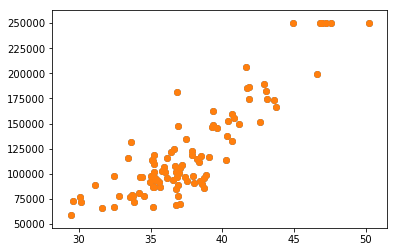

In [42]:
# 横軸をx, 縦軸をyの散布図(scatter)をプロット
plt.scatter(x, y)
plt.show() # showを実行しないと普通は描画されない

In [43]:
# 単回帰分析の実装
## データの中心化

In [44]:
# データの概要を表示
df.describe()

,x,y
count,100.000000,100.000000
mean,37.622220,121065.000000
std,4.087547,47174.009226
min,29.418000,59000.000000
25%,35.151000,90375.000000
50%,36.909000,104250.000000
75%,39.439500,147250.000000
max,50.250000,250000.000000


In [46]:
# データフレームごと平均をとる
df.mean()

x        37.62222
y    121065.00000
dtype: float64

In [49]:
# データフレームごと中心化する
df_c = df - df.mean()

In [50]:
df_c.head(3)

,x,y
0,2.73978,16435.0
1,3.06378,11435.0
2,0.80778,-28065.0


In [51]:
df_c.describe()

,x,y
count,1.000000e+02,100.000000
mean,1.989520e-15,0.000000
std,4.087547e+00,47174.009226
min,-8.204220e+00,-62065.000000
25%,-2.471220e+00,-30690.000000
50%,-7.132200e-01,-16815.000000
75%,1.817280e+00,26185.000000
max,1.262778e+01,128935.000000


In [52]:
# データの抽出
x = df_c['x']
y = df_c['y']

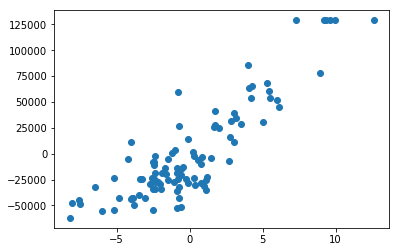

In [53]:
# xとyの散布図をプロット
plt.scatter(x, y)
plt.show()

パラメタaの計算
---------------
傾き$a$の計算式
$$
 a= \frac{\displaystyle{\sum_{n=1}^Nx_{n}y_{n}}}
{\displaystyle{{\sum_{n=1}^Nx_{n}^2}}}
$$

In [54]:
xx = x * x
xy = x * y

In [55]:
a = xy.sum() / xx.sum()

In [57]:
a

10069.022519284064

## プロットして確認
$$
\hat{y}=ax
$$

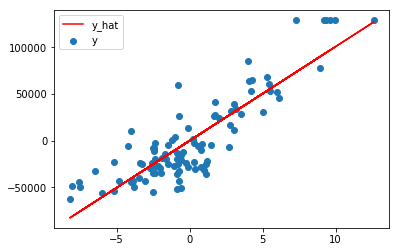

In [62]:
plt.scatter(x, y, label='y') # 実際の値(実測値)
plt.plot(x, a * x, label='y_hat', color='red') # plotは折れ線グラフ
plt.legend()
plt.show()

予測値の計算
------------------------
$$
\begin{align}
y - {\bar y} &= a (x-{\bar x}) \\
\rightarrow y &= a (x-{\bar x}) + {\bar y}
\end{align}
$$

In [64]:
x_new = 40 # 40平米の部屋

In [67]:
mean = df.mean()

In [68]:
mean['x']

37.622219999999999

In [72]:
xc = x_new - mean['x']

In [73]:
xc

2.3777800000000013

In [75]:
# 単回帰分析による予測
yc = a * xc

In [76]:
yc 

23941.920365903276

In [77]:
# 元のスケールの予測値
y_hat = a * xc + mean['y']

In [78]:
y_hat

145006.92036590326

予測値を計算する関数の作成
-----------------------

In [83]:
def predict(x):
    # 定数項
    a = 10069.022519284064
    xm = 37.622219999999999
    ym = 121065.0
    # 中心化
    xc = x - xm
    # 予測値の計算
    y_hat = a * xc + ym
    return y_hat

In [84]:
# 予測値の計算
predict(40)

145006.92036590326

In [86]:
predict(30)

44316.69517306263

In [88]:
# 外挿の範囲は上手くできない可能性がある
predict(25)
predict(10)

-157063.75521261868